# 1.) Import the data from CCLE into a new Google Colab file

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sklearn as sk

In [ ]:
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [ ]:
df.loc[df["sex"] == "female","sex"] = 1
df.loc[df["sex"] == "male","sex"] = 0

In [ ]:
df.loc[df["smoker"] == "yes","smoker"] = 1
df.loc[df["smoker"] == "no","smoker"] = 0

In [ ]:
df.loc[df["region"] == "southwest","is_southwest"] = 1
df.loc[df["region"] != "southwest","is_southwest"] = 0
df.loc[df["region"] == "southeast","is_southeast"] = 1
df.loc[df["region"] != "southeast","is_southeast"] = 0
df.loc[df["region"] == "northwest","is_northwest"] = 1
df.loc[df["region"] != "northwest","is_northwest"] = 0

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,is_southwest,is_southeast,is_northwest
0,19,1,27.900,0,1,southwest,16884.92400,1.0,0.0,0.0
1,18,0,33.770,1,0,southeast,1725.55230,0.0,1.0,0.0
2,28,0,33.000,3,0,southeast,4449.46200,0.0,1.0,0.0
3,33,0,22.705,0,0,northwest,21984.47061,0.0,0.0,1.0
4,32,0,28.880,0,0,northwest,3866.85520,0.0,0.0,1.0


# 2.) Split the data into 80/20, in/out sample

In [ ]:
import numpy as np

In [ ]:
df1 = df[['age','sex','bmi','children','smoker','is_southwest','is_southeast','is_northwest']]

In [ ]:
df1

,age,sex,bmi,children,smoker,is_southwest,is_southeast,is_northwest
0,19,1,27.900,0,1,1.0,0.0,0.0
1,18,0,33.770,1,0,0.0,1.0,0.0
2,28,0,33.000,3,0,0.0,1.0,0.0
3,33,0,22.705,0,0,0.0,0.0,1.0
4,32,0,28.880,0,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0.0,0.0,1.0
1334,18,1,31.920,0,0,0.0,0.0,0.0
1335,18,1,36.850,0,0,0.0,1.0,0.0
1336,21,1,25.800,0,0,1.0,0.0,0.0


In [ ]:
cut = int((len(df1) * .8) // 1)

In [ ]:
in_data = df1[:cut]
out_data = df1[cut:]

in_target = df['charges'][:cut]
out_target = df['charges'][cut:]

In [ ]:
in_data.head()

,age,sex,bmi,children,smoker,is_southwest,is_southeast,is_northwest
0,19,1,27.900,0,1,1.0,0.0,0.0
1,18,0,33.770,1,0,0.0,1.0,0.0
2,28,0,33.000,3,0,0.0,1.0,0.0
3,33,0,22.705,0,0,0.0,0.0,1.0
4,32,0,28.880,0,0,0.0,0.0,1.0


# 3.) Normalize the Data

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)
out_data_scale = scaler.transform(out_data)

In [ ]:
in_data_scale

array([[-1.45390122,  1.02077653, -0.47403991, ...,  1.76504522,
        -0.6155209 , -0.55791981],
       [-1.52464584, -0.97964634,  0.4911621 , ..., -0.56655772,
         1.6246402 , -0.55791981],
       [-0.81719959, -0.97964634,  0.36455128, ..., -0.56655772,
         1.6246402 , -0.55791981],
       ...,
       [-0.03900872, -0.97964634,  1.95211949, ..., -0.56655772,
        -0.6155209 , -0.55791981],
       [ 1.65886228, -0.97964634, -1.50008089, ..., -0.56655772,
        -0.6155209 ,  1.79237229],
       [ 1.02216066,  1.02077653,  0.18367867, ..., -0.56655772,
         1.6246402 , -0.55791981]])

# 4.) Get lambda from Lasso cross validation

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
mod1 = LassoCV().fit(in_data_scale, in_target)

In [ ]:
a = mod1.alpha_

In [ ]:
a

115.9799859390741

# 5.) Run a lambda regression with that Lambda

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
mod1 = Lasso(alpha = a).fit(in_data_scale, in_target)

In [ ]:
b = mod1.coef_
b

array([3580.35805206,    0.        , 1897.42890992,  415.06890389,
       9345.10115447, -238.7634887 , -158.68185954,   -0.        ])

# 6.) Visualize the coefficients 

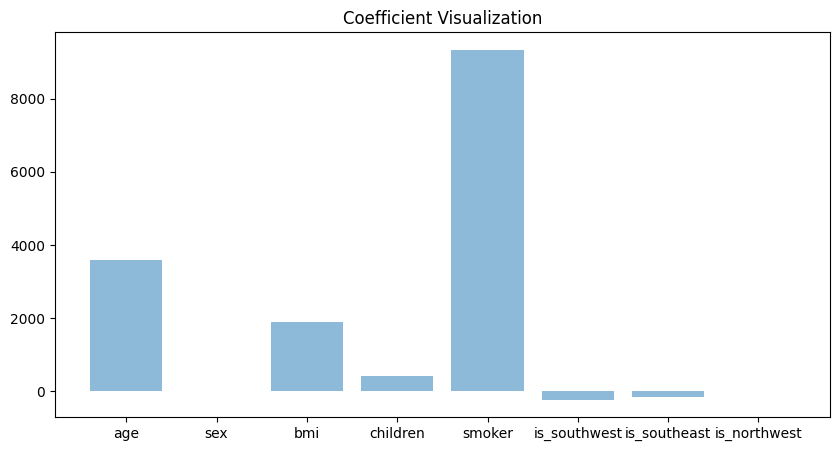

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('age','sex','bmi','children','smoker','is_southwest','is_southeast','is_northwest')
plt.figure(figsize = (10,5))
plt.bar(objects, b, alpha=0.5)
plt.title('Coefficient Visualization')

plt.show()

# 7.) Interpret the coefficients

The graph above shows that, smoker has the most significant effect on charges, while sex and is_northwest has little effect. Furthermore, age, bmi, children and smoker have positive effects on chrages, while is_southwest and is_southeast have negative effects.

# 8.) Compare in and out of sample MSE’s

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
in_predict = mod1.predict(in_data_scale)
out_predict = mod1.predict(out_data_scale)

In [ ]:
in_mse = mse(in_predict, in_target)
out_mse = mse(out_predict, out_target)

In [ ]:
in_mse

36521811.462161295

In [ ]:
out_mse

37152269.57019608

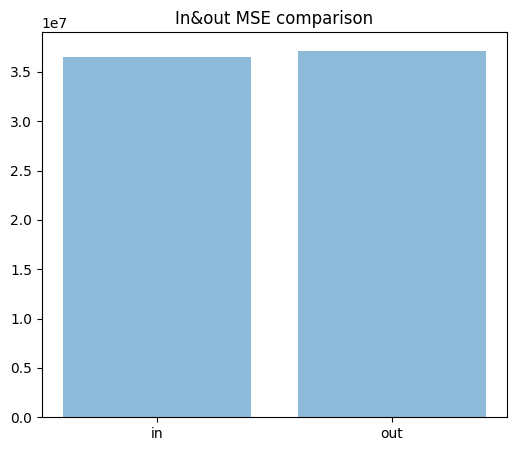

In [ ]:
plt.figure(figsize = (6,5))
plt.bar(['in','out'], [in_mse, out_mse], alpha=0.5)
plt.title('In&out MSE comparison')

plt.show()